### 0217. Contains Duplicate (Hash Set Approach)

| **Author** | **Last Updated** | **Difficulty** | **Tags** |
| :--- | :--- | :--- | :--- |
| MD Saifullah Baig.A | 02.01.2026 | Easy | Array, Hash Table |

**Problem Link:** [LeetCode 0217](https://leetcode.com/problems/contains-duplicate/)

---

## 1. Problem Statement
Given an integer array `nums`, return `true` if any value appears **at least twice** in the array, and return `false` if every element is distinct.

## 2. Approach: Hash Set (Optimal)
We use a **Hash Set** to keep track of unique elements we have encountered so far.
1. Initialize an empty set `seen`.
2. Iterate through each number `n` in `nums`.
3. Check if `n` is already in `seen`.
   - **Yes:** Duplicate found! Return `True`.
   - **No:** Add `n` to `seen`.
4. Return `False` if the loop finishes.

## 3. Complexity Analysis
* **Time Complexity:** $O(N)$
  - We traverse the array once. Set lookups and insertions are $O(1)$ on average.
* **Space Complexity:** $O(N)$
  - In the worst case (all distinct), the set stores $N$ elements.

## 4. Verdict
* **Best Approach** for speed. This is the standard interview .

In [1]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        hash_set=set()
        for i in nums:
            if i in hash_set:
                return True
            hash_set.add(i)
        return False

In [2]:
answer=Solution()
nums=[1,1,1,3,3,4,3,2,4,2]
print(answer.containsDuplicate(nums))

True


## OTHER APPROACHES

In [3]:
from collections import Counter
class Solution():
        
        def containsDuplicate(self, nums: List[int]) -> bool:
                hash_set=set()
                for i in nums:
                        if i in hash_set:
                                return True
                        hash_set.add(i)
                return False
        def brute_force(self, nums: List[int]) -> bool:
                for i in nums:
                        for j in nums[1+i:]:
                                if i==j :
                                        return True
                        return False

        def sorting(self, nums: List[int]) -> bool:
                nums.sort()
                for i in range(len(nums)-1):
                        if nums[i]==nums[i+1]:
                                return True
                return False

        def hash_length_comparision(self, nums: List[int]) -> bool:
                return True if len(nums)>len(set(nums)) else False

        def frequency_counter(self, nums: List[int]) -> bool:
                count=Counter(nums)
                for i in count.values():
                        if i>1:
                                return True
                return False
        

## Performance Visualisation

Running Benchmark...


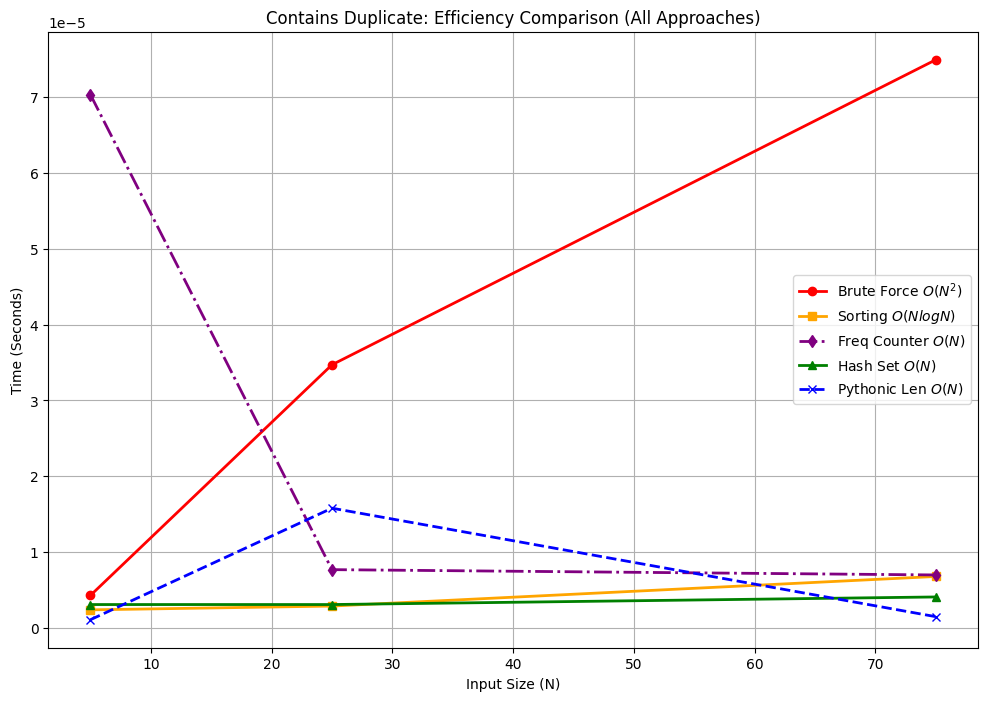

In [4]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from collections import Counter

class Solution:
    # 1. Brute Force O(N^2)
    def brute_force(self, nums: List[int]) -> bool:
        n = len(nums)
        for i in range(n):
            for j in range(i + 1, n):
                if nums[i] == nums[j]:
                    return True
        return False

    # 2. Sorting O(N log N)
    def sorting(self, nums: List[int]) -> bool:
        nums.sort()
        for i in range(len(nums)-1):
            if nums[i] == nums[i+1]:
                return True
        return False

    # 3. Hash Set O(N)
    def hash_set(self, nums: List[int]) -> bool:
        hash_set = set()
        for i in nums:
            if i in hash_set:
                return True
            hash_set.add(i)
        return False

    # 4. Pythonic Length O(N)
    def hash_length_comparison(self, nums: List[int]) -> bool:
        return len(nums) != len(set(nums))

    # 5. Frequency Counter O(N)
    def frequency_counter(self, nums: List[int]) -> bool:
        count = Counter(nums)
        for i in count.values():
            if i > 1:
                return True
        return False

def run_benchmark():
    solution = Solution()
    
    # Input sizes (Capped at 75 so Brute Force doesn't freeze)
    input_sizes = [5,25,75]
    results = []

    print("Running Benchmark...")

    for n in input_sizes:
        # WORST CASE: No duplicates
        nums = list(range(n))
        
        # 1. Brute Force
        start = time.perf_counter()
        solution.brute_force(nums)
        t_brute = time.perf_counter() - start

        # 2. Sorting (Shuffle first)
        nums_copy = nums.copy() 
        random.shuffle(nums_copy)
        start = time.perf_counter()
        solution.sorting(nums_copy)
        t_sort = time.perf_counter() - start

        # 3. Hash Set
        start = time.perf_counter()
        solution.hash_set(nums)
        t_hash = time.perf_counter() - start

        # 4. Pythonic Length
        start = time.perf_counter()
        solution.hash_length_comparison(nums)
        t_len = time.perf_counter() - start
        
        # 5. Frequency Counter
        start = time.perf_counter()
        solution.frequency_counter(nums)
        t_count = time.perf_counter() - start

        results.append({
            "N": n,
            "Brute Force": t_brute,
            "Sorting": t_sort,
            "Hash Set": t_hash,
            "Pythonic Len": t_len,
            "Freq Counter": t_count
        })

    df = pd.DataFrame(results)
    
    # --- PLOTTING SINGLE CHART ---
    plt.figure(figsize=(12, 8))
    
    plt.plot(df["N"], df["Brute Force"], label='Brute Force $O(N^2)$', marker='o', color='red', linewidth=2)
    plt.plot(df["N"], df["Sorting"], label='Sorting $O(N log N)$', marker='s', color='orange', linewidth=2)
    plt.plot(df["N"], df["Freq Counter"], label='Freq Counter $O(N)$', marker='d', color='purple', linestyle='-.', linewidth=2)
    plt.plot(df["N"], df["Hash Set"], label='Hash Set $O(N)$', marker='^', color='green', linewidth=2)
    plt.plot(df["N"], df["Pythonic Len"], label='Pythonic Len $O(N)$', marker='x', color='blue', linestyle='--', linewidth=2)
    
    plt.title('Contains Duplicate: Efficiency Comparison (All Approaches)')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Time (Seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    run_benchmark()